In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
WORKDIR = "/Users/annakotlova/Documents/names/"

In [5]:
names_by_year = {}
for year in range(1900, 2001, 10):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(WORKDIR, year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [6]:
names_all.head(10)

Name Gender  Count
Year Pos                         
1900 0         Mary      F  16706
     1        Helen      F   6343
     2         Anna      F   6114
     3     Margaret      F   5304
     4         Ruth      F   4765
     5    Elizabeth      F   4096
     6     Florence      F   3920
     7        Ethel      F   3896
     8        Marie      F   3856
     9      Lillian      F   3414

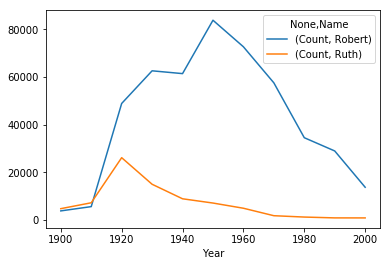

In [7]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

DatetimeIndex(['1900-12-31', '1905-12-31', '1910-12-31', '1915-12-31',
               '1920-12-31', '1925-12-31', '1930-12-31', '1935-12-31',
               '1940-12-31', '1945-12-31', '1950-12-31', '1955-12-31',
               '1960-12-31', '1965-12-31', '1970-12-31', '1975-12-31',
               '1980-12-31', '1985-12-31', '1990-12-31', '1995-12-31',
               '2000-12-31'],
              dtype='datetime64[ns]', freq='5A-DEC')

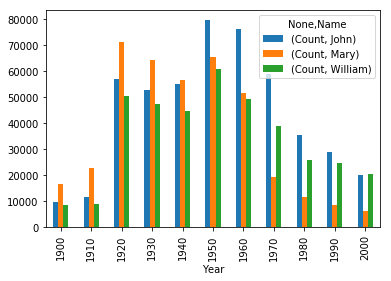

In [8]:
name_dynamics.query('Name == ["John", "Mary", "William"]').unstack('Name').plot.bar()
pd.date_range('1900', periods=21, freq='5Y')

In [19]:
names_for_pie = pd.read_csv(
    WORKDIR + 'yob1950.txt', 
    names=['Name','Gender','Count']
)
names_for_pie[names_for_pie.Name.str.startswith('R')].sort_values(by='Count', ascending=False).head(10)

,Name,Gender,Count
6114,Robert,M,83575
6119,Richard,M,51014
6124,Ronald,M,29917
6139,Roger,M,12551
6143,Raymond,M,11180
35,Rebecca,F,9426
48,Ruth,F,7128
6163,Roy,M,6459
55,Rita,F,6425
6164,Ralph,M,6406


In [20]:
names_for_pie.plot.pie(y='Count')

ValueError: Image size of 374x154600 pixels is too large. It must be less than 2^16 in each direction.